Для начала импортируем библиотеки, которые мы будем использовать.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

## Чтение данных и их обработка

In [ ]:
dataframe = pd.read_json('data.json')
dataframe

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


По данному датафрейму нельзя обучить модель, так как колонка ingredients имеет тип элементов list. \
Сделаем преобразование данной колонки с помощью следующего алгоритма действий.\
Во первых нужно найти все уникальные ингридиенты, которые есть и создать колонки с названиями ингредиентов. Если ингредиент есть, то поставить в ячейке значение 1, если нет, то поставить значение 0.

In [ ]:
unique_ingredients = []
for string in dataframe['ingredients']:
    for ingredient in string:
        unique_ingredients.append(ingredient)
unique_ingredients = list(set(unique_ingredients))
len(unique_ingredients)

6714

In [ ]:
dataframe.loc[:, unique_ingredients] = 0

In [ ]:
dataframe

,id,cuisine,ingredients,acorn squash,black trumpet mushrooms,chinese wolfberries,macarons,boneless pork shoulder,peeled prawns,sweet gherkin,...,minced peperoncini,mixed nuts,chopped hazelnuts,Dole Seven Lettuces,seasoning rub,grated jack cheese,lime peel,cooked turkey,rib-eye roast,salted anchovies
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for j, line in enumerate(dataframe['ingredients']):
    for ingredient in line:
        dataframe.loc[j, ingredient] = 1

In [ ]:
dataframe

,id,cuisine,ingredients,acorn squash,black trumpet mushrooms,chinese wolfberries,macarons,boneless pork shoulder,peeled prawns,sweet gherkin,...,minced peperoncini,mixed nuts,chopped hazelnuts,Dole Seven Lettuces,seasoning rub,grated jack cheese,lime peel,cooked turkey,rib-eye roast,salted anchovies
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь после того, как мы декодировали колонку ingredients, можно убрать её

In [ ]:
dataframe = dataframe.drop(columns='ingredients')

In [ ]:
dataframe

,id,cuisine,acorn squash,black trumpet mushrooms,chinese wolfberries,macarons,boneless pork shoulder,peeled prawns,sweet gherkin,barley,...,minced peperoncini,mixed nuts,chopped hazelnuts,Dole Seven Lettuces,seasoning rub,grated jack cheese,lime peel,cooked turkey,rib-eye roast,salted anchovies
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь dataframe готов к анализу и обучению моделей.

## Анализ данных

Посмотрим сколько всего классов в данной задачи классификации.

In [ ]:
dataframe['cuisine'].nunique()

20

Всего 20 классов, это задача мультиклассификации на 20 классов.\
Таргетом будет являться колонка 'cuisine'. Посмотрим на распределение таргета.

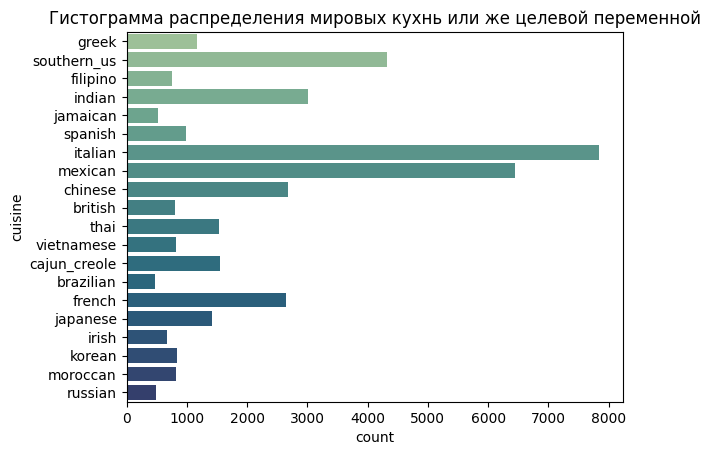

In [ ]:
plt.title('Гистограмма распределения мировых кухнь или же целевой переменной')
sns.countplot(dataframe, y='cuisine', palette="crest");

Распределение таргета отличается от дискретного равномерного, то есть классы не сбалансированы.

Также будет интересно узнать самые частоиспользуемые ингредиенты во всём dataframe.

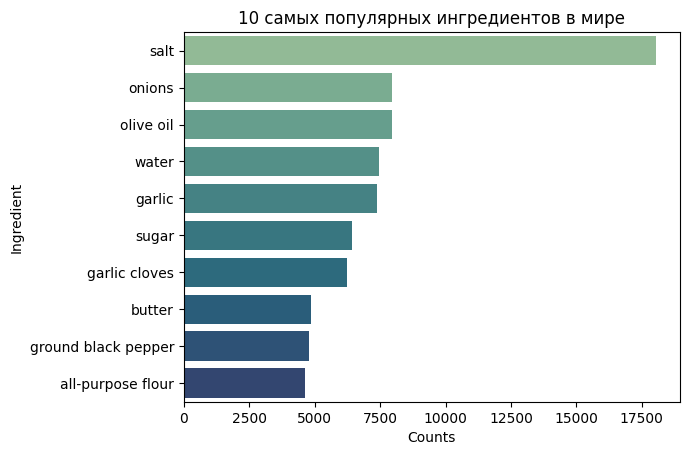

In [ ]:
plt.title('10 самых популярных ингредиентов в мире')
sns.barplot(
    data=pd.DataFrame(
        {'Ingredient':dataframe.drop(columns=['id', 'cuisine']).sum(axis=0).sort_values(ascending=False).head(10).index,
         'Counts': dataframe.drop(columns=['id', 'cuisine']).sum(axis=0).sort_values(ascending=False).head(10).values}
        ),
    x='Counts',
    y='Ingredient',
    palette='crest');

Самым популярным ингредиентом в мире является соль.

Также можно взять из dataframe только определенные кухни мира, и посмотреть там самые популярные ингредиенты.

Для примера рассмотрим индийскую, китайскую, японскую и испанскую кухню.

In [ ]:
spanish_cuisine = dataframe[dataframe['cuisine'] == 'spanish'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
spanish_cuisine = pd.DataFrame({'ingredient': spanish_cuisine.index, 'counts': spanish_cuisine.values})
spanish_cuisine

,ingredient,counts
0,salt,460
1,olive oil,387
2,garlic cloves,290
3,extra-virgin olive oil,255
4,onions,253
5,water,158
6,tomatoes,151
7,ground black pepper,149
8,red bell pepper,142
9,pepper,133


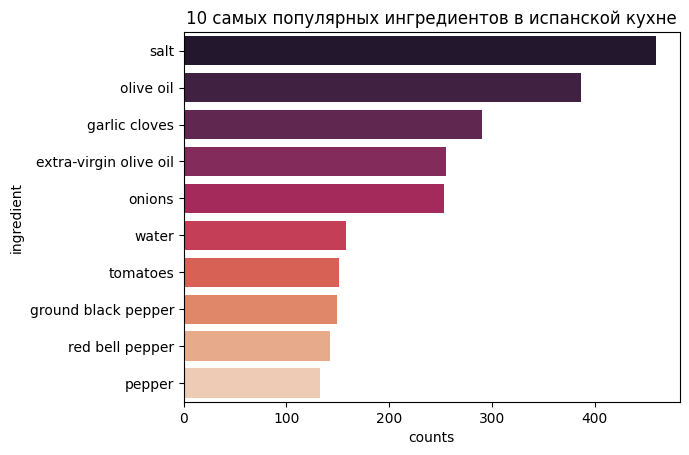

In [ ]:
plt.title('10 самых популярных ингредиентов в испанской кухне')
sns.barplot(data=spanish_cuisine, x='counts', y='ingredient', palette='rocket');

In [ ]:
japanese_cuisine = dataframe[dataframe['cuisine'] == 'japanese'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
japanese_cuisine = pd.DataFrame({'ingredient': japanese_cuisine.index, 'counts': japanese_cuisine.values})
japanese_cuisine

,ingredient,counts
0,soy sauce,561
1,salt,422
2,mirin,402
3,sugar,401
4,water,383
5,sake,289
6,rice vinegar,261
7,vegetable oil,245
8,scallions,229
9,ginger,190


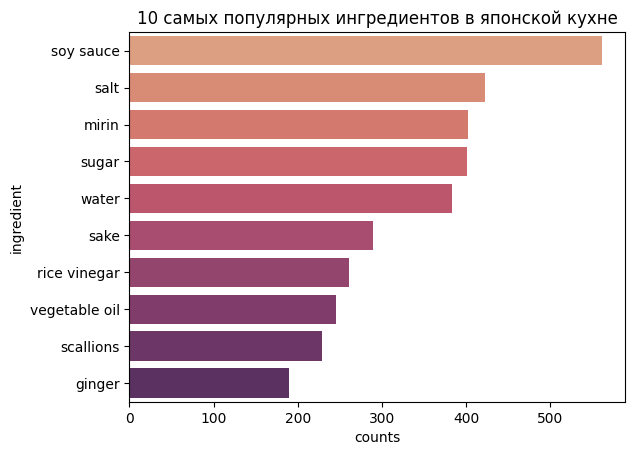

In [ ]:
plt.title('10 самых популярных ингредиентов в японской кухне')
sns.barplot(data=japanese_cuisine, x='counts', y='ingredient', palette='flare');

В японской кухне самый популярный ингредиент - это не соль, а соевый соус.

In [ ]:
chinese_cuisine = dataframe[dataframe['cuisine'] == 'chinese'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
chinese_cuisine = pd.DataFrame({'ingredient': chinese_cuisine.index, 'counts': chinese_cuisine.values})
chinese_cuisine

,ingredient,counts
0,soy sauce,1363
1,sesame oil,915
2,salt,907
3,corn starch,906
4,sugar,824
5,garlic,763
6,water,762
7,green onions,628
8,vegetable oil,602
9,scallions,591


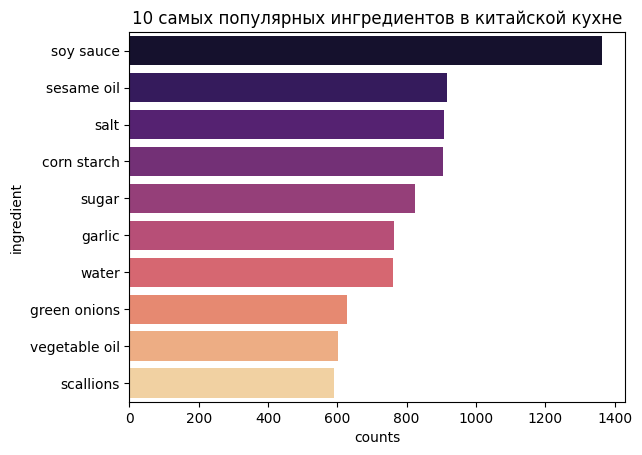

In [ ]:
plt.title('10 самых популярных ингредиентов в китайской кухне')
sns.barplot(data=chinese_cuisine, x='counts', y='ingredient', palette='magma');

Тут тоже соевый соус самый популярный ингеридент, это было ожидаемо

In [ ]:
indian_cuisine = dataframe[dataframe['cuisine'] == 'indian'].drop(columns=['id', 'cuisine']).sum(axis=0)\
    .sort_values(ascending=False).head(10)
indian_cuisine = pd.DataFrame({'ingredient': indian_cuisine.index, 'counts': indian_cuisine.values})
indian_cuisine

,ingredient,counts
0,salt,1934
1,onions,1195
2,garam masala,862
3,water,820
4,ground turmeric,728
5,garlic,726
6,cumin seed,697
7,ground cumin,683
8,vegetable oil,593
9,oil,546


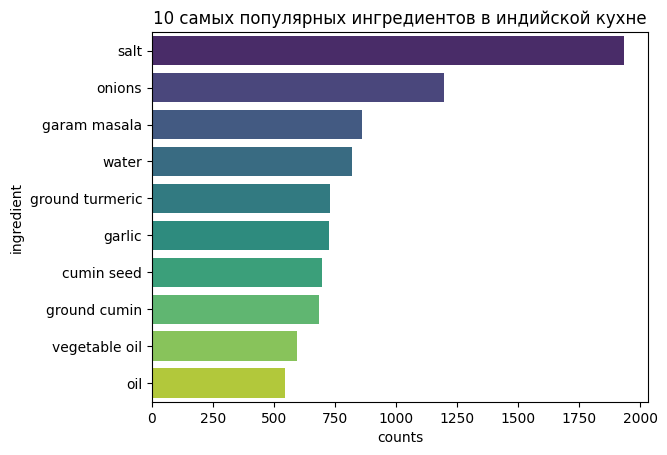

In [ ]:
plt.title('10 самых популярных ингредиентов в индийской кухне')
sns.barplot(data=indian_cuisine, x='counts', y='ingredient', palette='viridis');

Самый популярный ингредиент - это соль, но на третьем месте есть индийская приправа - гарам масала.

Для остальных кухнонь можно проделать аналогичные действия.

## Кодирование таргета, разделение данных на train и test части.

Закодируем target, который имеет тип object в число int, так как некоторые библиотеки плохо работают со строковым target.\
Это можо сделать с помощью LabelEncoder из бибилиотеки sklearn.

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(dataframe['cuisine'])
dataframe['cuisine'] = label_encoder.transform(dataframe['cuisine'])

In [ ]:
dataframe

,id,cuisine,acorn squash,black trumpet mushrooms,chinese wolfberries,macarons,boneless pork shoulder,peeled prawns,sweet gherkin,barley,...,minced peperoncini,mixed nuts,chopped hazelnuts,Dole Seven Lettuces,seasoning rub,grated jack cheese,lime peel,cooked turkey,rib-eye roast,salted anchovies
0,10259,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Теперь можно поделить данные на тренировочный и обучающий датасет с помощью train_test_split.

In [ ]:
features = dataframe.drop(columns=['id', 'cuisine']).values
target  = dataframe['cuisine'].values

In [ ]:
Train_features, Test_features, train_target, test_target = train_test_split(features, target, random_state=993,
                                                                            test_size=0.3, stratify=target)

In [ ]:
Train_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
train_target

array([13, 19, 16, ...,  7, 18,  2])

Был использован stratify так как распределение классов неравномерное.\
Теперь всё готово для обучения моделей.

## Обучение моделей

Для начала попробуем обучить логистическую регрессию. Простую линейную модель для задачи классификации.

In [ ]:
log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(Train_features, train_target)
predicted_values = log_reg.predict(Test_features)
accuracy_score(predicted_values, test_target)

0.7733176904382804

И логистическую регрессию с l1 регуляризацией.

In [ ]:
log_reg_with_l1_regularization = LogisticRegression(solver='liblinear', penalty='l1')
log_reg_with_l1_regularization.fit(Train_features, train_target)
predicted_values = log_reg_with_l1_regularization.predict(Test_features)
accuracy_score(predicted_values, test_target)

0.7677030084639236

l1 регуляризация дала более худший результат

Также обучим простое дерево решений с помощью перебора гиперпараметров по сетке

In [ ]:
tree = DecisionTreeClassifier()
grid_classificator = GridSearchCV(tree, param_grid={'max_depth': [10, 25, 50]})
grid_classificator.fit(Train_features, train_target)
tree = grid_classificator.best_estimator_
predicted_values = tree.predict(Test_features)
accuracy_score(predicted_values, test_target)

0.5482276041230202

In [ ]:
grid_classificator.best_params_

{'max_depth': 50}

Это оптимальная глубина дерева.\
Можно и дальше подбирать гиперпараметры, но из-за большой размерности задачи это происходит очень долго, так как tree ищет оптимальное разделение по колонкам фичей, которых 6714.

In [ ]:
features = dataframe.drop(columns=['id', 'cuisine'])
target  = dataframe['cuisine']
Train_features, Test_features, train_target, test_target = train_test_split(features, target, random_state=993,
                                                                            test_size=0.3, stratify=target)
Train_features

,loin,apple slice,yellow rice,pig's trotters,sodium reduced beef broth,arctic char,low-fat baked tortilla chips,chunky tomato sauce,large marshmallows,crusty rolls,canola oil,orgeat syrup,salt free seasoning,chai tea concentrate,semisweet chocolate chunks,"linguine, cook and drain",Kung Pao sauce,Frank's® RedHot® Original Cayenne Pepper Sauce,Asian chili sauce,pork shanks,KRAFT Shredded Cheddar Cheese,satsumas,apple jelly,knorr chipotl minicub,back ribs,guajillo,bay leaves,tomato juice,gluten free barbecue sauce,celery seed,prosecco,potato flakes,char fillets,duck liver,fresh shiitake mushrooms,barolo,gelatin,umeboshi paste,hazelnuts,beef gravy,sweet rice,poolish,mahlab,smoked paprika,sucanat,red enchilada sauce,diced tomatoes,marinara sauce,jamaican jerk marinade,watercress,stevia,TACO BELL® Thick & Chunky Mild Salsa,cod,komatsuna,salt and ground black pepper,cookies,panko breadcrumbs,chipotle chile powder,bamboo shoots,wholemeal flour,...,Spice Islands Oregano,mild pork sausage,vanilla low-fat frozen yogurt,kangkong,french baguette,chilled prosecco,idli,Mrs. Dash,sweet gherkin,bananas,organic butter,asian pear,prunes,celery root,meat loaf mix,feet,minced pork,no-salt-added diced tomatoes,vanilla flavoring,ground caraway,frozen spring roll wrappers,fresh spinach,lemon soda,ranch dip,grana padano,whipped butter,scape pesto,littleneck clams,spinach,OREO® Cookies,minced meat,reduced sodium vegetable stock,boneless chicken thighs,canned beef broth,chicken breast strips,Biryani Masala,malt syrup,salami,hamachi fillets,red apples,oat bran,dried shiitake mushrooms,cooked italian meatballs,small new potatoes,roasted bell peppers,whole wheat bread dough,chocolate flavored liqueur,pimento stuffed olives,hot chili paste,sweet sherry,aka miso,fresh masa,polish sausage,crackers,blackcurrant syrup,japanese style bread crumbs,sorbet,ciabatta loaf,chicken broth,tony chachere's seasoning
8640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2385,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
boosting_clf = CatBoostClassifier(iterations=1500,
                                  loss_function='MultiClass',
                                  task_type="GPU",
                                  devices='0:1')
boosting_clf.fit(Train_features, train_target)

Learning rate set to 0.091267
0:	learn: 2.7366308	total: 139ms	remaining: 3m 28s
1:	learn: 2.6179286	total: 268ms	remaining: 3m 20s
2:	learn: 2.5238068	total: 335ms	remaining: 2m 47s
3:	learn: 2.4389278	total: 377ms	remaining: 2m 20s
4:	learn: 2.3715833	total: 424ms	remaining: 2m 6s
5:	learn: 2.3168855	total: 461ms	remaining: 1m 54s
6:	learn: 2.2738626	total: 497ms	remaining: 1m 45s
7:	learn: 2.2350523	total: 531ms	remaining: 1m 39s
8:	learn: 2.2053829	total: 561ms	remaining: 1m 33s
9:	learn: 2.1666657	total: 599ms	remaining: 1m 29s
10:	learn: 2.1398675	total: 632ms	remaining: 1m 25s
11:	learn: 2.1120492	total: 662ms	remaining: 1m 22s
12:	learn: 2.0915761	total: 697ms	remaining: 1m 19s
13:	learn: 2.0688411	total: 734ms	remaining: 1m 17s
14:	learn: 2.0414967	total: 758ms	remaining: 1m 15s
15:	learn: 2.0271094	total: 785ms	remaining: 1m 12s
16:	learn: 2.0130634	total: 818ms	remaining: 1m 11s
17:	learn: 1.9969513	total: 850ms	remaining: 1m 10s
18:	learn: 1.9780497	total: 876ms	remaining: 

162:	learn: 1.3543916	total: 4.77s	remaining: 39.1s
163:	learn: 1.3526235	total: 4.8s	remaining: 39.1s
164:	learn: 1.3502352	total: 4.83s	remaining: 39.1s
165:	learn: 1.3490780	total: 4.85s	remaining: 39s
166:	learn: 1.3469164	total: 4.87s	remaining: 38.9s
167:	learn: 1.3453972	total: 4.9s	remaining: 38.8s
168:	learn: 1.3438519	total: 4.92s	remaining: 38.8s
169:	learn: 1.3421613	total: 4.95s	remaining: 38.7s
170:	learn: 1.3409127	total: 4.97s	remaining: 38.6s
171:	learn: 1.3396695	total: 5s	remaining: 38.6s
172:	learn: 1.3382683	total: 5.02s	remaining: 38.5s
173:	learn: 1.3368512	total: 5.04s	remaining: 38.4s
174:	learn: 1.3355350	total: 5.07s	remaining: 38.4s
175:	learn: 1.3345284	total: 5.09s	remaining: 38.3s
176:	learn: 1.3318573	total: 5.12s	remaining: 38.3s
177:	learn: 1.3307653	total: 5.15s	remaining: 38.2s
178:	learn: 1.3300208	total: 5.17s	remaining: 38.1s
179:	learn: 1.3275719	total: 5.2s	remaining: 38.1s
180:	learn: 1.3267490	total: 5.22s	remaining: 38.1s
181:	learn: 1.325016

327:	learn: 1.1616650	total: 8.93s	remaining: 31.9s
328:	learn: 1.1611622	total: 8.96s	remaining: 31.9s
329:	learn: 1.1603659	total: 8.98s	remaining: 31.9s
330:	learn: 1.1593204	total: 9.01s	remaining: 31.8s
331:	learn: 1.1583307	total: 9.03s	remaining: 31.8s
332:	learn: 1.1568201	total: 9.06s	remaining: 31.8s
333:	learn: 1.1560896	total: 9.09s	remaining: 31.7s
334:	learn: 1.1552416	total: 9.12s	remaining: 31.7s
335:	learn: 1.1542520	total: 9.14s	remaining: 31.7s
336:	learn: 1.1535359	total: 9.16s	remaining: 31.6s
337:	learn: 1.1531393	total: 9.19s	remaining: 31.6s
338:	learn: 1.1527703	total: 9.21s	remaining: 31.5s
339:	learn: 1.1522041	total: 9.23s	remaining: 31.5s
340:	learn: 1.1511771	total: 9.26s	remaining: 31.5s
341:	learn: 1.1506957	total: 9.28s	remaining: 31.4s
342:	learn: 1.1494640	total: 9.3s	remaining: 31.4s
343:	learn: 1.1482602	total: 9.33s	remaining: 31.4s
344:	learn: 1.1473948	total: 9.36s	remaining: 31.3s
345:	learn: 1.1464511	total: 9.39s	remaining: 31.3s
346:	learn: 1

493:	learn: 1.0549840	total: 13.1s	remaining: 26.6s
494:	learn: 1.0545626	total: 13.1s	remaining: 26.6s
495:	learn: 1.0540373	total: 13.1s	remaining: 26.6s
496:	learn: 1.0533298	total: 13.2s	remaining: 26.5s
497:	learn: 1.0530830	total: 13.2s	remaining: 26.5s
498:	learn: 1.0525623	total: 13.2s	remaining: 26.5s
499:	learn: 1.0519882	total: 13.2s	remaining: 26.5s
500:	learn: 1.0515160	total: 13.3s	remaining: 26.4s
501:	learn: 1.0510730	total: 13.3s	remaining: 26.4s
502:	learn: 1.0501197	total: 13.3s	remaining: 26.4s
503:	learn: 1.0497485	total: 13.3s	remaining: 26.3s
504:	learn: 1.0492553	total: 13.4s	remaining: 26.3s
505:	learn: 1.0483715	total: 13.4s	remaining: 26.3s
506:	learn: 1.0479422	total: 13.4s	remaining: 26.3s
507:	learn: 1.0473816	total: 13.4s	remaining: 26.2s
508:	learn: 1.0471306	total: 13.5s	remaining: 26.2s
509:	learn: 1.0467040	total: 13.5s	remaining: 26.2s
510:	learn: 1.0464111	total: 13.5s	remaining: 26.1s
511:	learn: 1.0462098	total: 13.5s	remaining: 26.1s
512:	learn: 

654:	learn: 0.9889062	total: 17s	remaining: 22s
655:	learn: 0.9887130	total: 17.1s	remaining: 21.9s
656:	learn: 0.9881743	total: 17.1s	remaining: 21.9s
657:	learn: 0.9877873	total: 17.1s	remaining: 21.9s
658:	learn: 0.9874735	total: 17.1s	remaining: 21.9s
659:	learn: 0.9872575	total: 17.2s	remaining: 21.8s
660:	learn: 0.9871367	total: 17.2s	remaining: 21.8s
661:	learn: 0.9862498	total: 17.2s	remaining: 21.8s
662:	learn: 0.9861666	total: 17.2s	remaining: 21.8s
663:	learn: 0.9857638	total: 17.3s	remaining: 21.7s
664:	learn: 0.9854197	total: 17.3s	remaining: 21.7s
665:	learn: 0.9849357	total: 17.3s	remaining: 21.7s
666:	learn: 0.9847519	total: 17.3s	remaining: 21.6s
667:	learn: 0.9843989	total: 17.4s	remaining: 21.6s
668:	learn: 0.9839110	total: 17.4s	remaining: 21.6s
669:	learn: 0.9835957	total: 17.4s	remaining: 21.6s
670:	learn: 0.9834351	total: 17.4s	remaining: 21.5s
671:	learn: 0.9827099	total: 17.4s	remaining: 21.5s
672:	learn: 0.9824845	total: 17.5s	remaining: 21.5s
673:	learn: 0.98

817:	learn: 0.9444448	total: 21s	remaining: 17.5s
818:	learn: 0.9441764	total: 21s	remaining: 17.5s
819:	learn: 0.9438372	total: 21s	remaining: 17.4s
820:	learn: 0.9436699	total: 21s	remaining: 17.4s
821:	learn: 0.9435913	total: 21.1s	remaining: 17.4s
822:	learn: 0.9431329	total: 21.1s	remaining: 17.4s
823:	learn: 0.9427984	total: 21.1s	remaining: 17.3s
824:	learn: 0.9426059	total: 21.1s	remaining: 17.3s
825:	learn: 0.9422201	total: 21.2s	remaining: 17.3s
826:	learn: 0.9419356	total: 21.2s	remaining: 17.3s
827:	learn: 0.9416833	total: 21.2s	remaining: 17.2s
828:	learn: 0.9414956	total: 21.3s	remaining: 17.2s
829:	learn: 0.9414179	total: 21.3s	remaining: 17.2s
830:	learn: 0.9412586	total: 21.3s	remaining: 17.1s
831:	learn: 0.9407685	total: 21.3s	remaining: 17.1s
832:	learn: 0.9404742	total: 21.3s	remaining: 17.1s
833:	learn: 0.9402813	total: 21.4s	remaining: 17.1s
834:	learn: 0.9401653	total: 21.4s	remaining: 17s
835:	learn: 0.9399544	total: 21.4s	remaining: 17s
836:	learn: 0.9397838	to

977:	learn: 0.9110924	total: 24.7s	remaining: 13.2s
978:	learn: 0.9110500	total: 24.8s	remaining: 13.2s
979:	learn: 0.9108950	total: 24.8s	remaining: 13.2s
980:	learn: 0.9106919	total: 24.8s	remaining: 13.1s
981:	learn: 0.9103967	total: 24.8s	remaining: 13.1s
982:	learn: 0.9102246	total: 24.9s	remaining: 13.1s
983:	learn: 0.9101248	total: 24.9s	remaining: 13s
984:	learn: 0.9098985	total: 24.9s	remaining: 13s
985:	learn: 0.9097022	total: 24.9s	remaining: 13s
986:	learn: 0.9096675	total: 24.9s	remaining: 13s
987:	learn: 0.9095651	total: 25s	remaining: 12.9s
988:	learn: 0.9093746	total: 25s	remaining: 12.9s
989:	learn: 0.9092466	total: 25s	remaining: 12.9s
990:	learn: 0.9090460	total: 25s	remaining: 12.9s
991:	learn: 0.9088499	total: 25.1s	remaining: 12.8s
992:	learn: 0.9088253	total: 25.1s	remaining: 12.8s
993:	learn: 0.9087424	total: 25.1s	remaining: 12.8s
994:	learn: 0.9083269	total: 25.1s	remaining: 12.8s
995:	learn: 0.9082395	total: 25.2s	remaining: 12.7s
996:	learn: 0.9080925	total:

1136:	learn: 0.8847136	total: 28.5s	remaining: 9.1s
1137:	learn: 0.8846654	total: 28.5s	remaining: 9.08s
1138:	learn: 0.8846475	total: 28.6s	remaining: 9.05s
1139:	learn: 0.8846092	total: 28.6s	remaining: 9.02s
1140:	learn: 0.8845466	total: 28.6s	remaining: 9s
1141:	learn: 0.8841258	total: 28.6s	remaining: 8.97s
1142:	learn: 0.8840301	total: 28.7s	remaining: 8.95s
1143:	learn: 0.8838595	total: 28.7s	remaining: 8.92s
1144:	learn: 0.8838474	total: 28.7s	remaining: 8.9s
1145:	learn: 0.8838271	total: 28.7s	remaining: 8.87s
1146:	learn: 0.8837589	total: 28.7s	remaining: 8.84s
1147:	learn: 0.8835469	total: 28.8s	remaining: 8.82s
1148:	learn: 0.8835072	total: 28.8s	remaining: 8.79s
1149:	learn: 0.8832782	total: 28.8s	remaining: 8.77s
1150:	learn: 0.8832224	total: 28.8s	remaining: 8.74s
1151:	learn: 0.8830324	total: 28.9s	remaining: 8.72s
1152:	learn: 0.8828613	total: 28.9s	remaining: 8.69s
1153:	learn: 0.8828213	total: 28.9s	remaining: 8.66s
1154:	learn: 0.8825571	total: 28.9s	remaining: 8.64

1296:	learn: 0.8636540	total: 32.3s	remaining: 5.05s
1297:	learn: 0.8635357	total: 32.3s	remaining: 5.03s
1298:	learn: 0.8634991	total: 32.3s	remaining: 5s
1299:	learn: 0.8634706	total: 32.3s	remaining: 4.98s
1300:	learn: 0.8634491	total: 32.4s	remaining: 4.95s
1301:	learn: 0.8633146	total: 32.4s	remaining: 4.92s
1302:	learn: 0.8632971	total: 32.4s	remaining: 4.9s
1303:	learn: 0.8632686	total: 32.4s	remaining: 4.87s
1304:	learn: 0.8627361	total: 32.5s	remaining: 4.85s
1305:	learn: 0.8626868	total: 32.5s	remaining: 4.83s
1306:	learn: 0.8626377	total: 32.5s	remaining: 4.8s
1307:	learn: 0.8626067	total: 32.5s	remaining: 4.78s
1308:	learn: 0.8625909	total: 32.6s	remaining: 4.75s
1309:	learn: 0.8624486	total: 32.6s	remaining: 4.72s
1310:	learn: 0.8623646	total: 32.6s	remaining: 4.7s
1311:	learn: 0.8621270	total: 32.6s	remaining: 4.67s
1312:	learn: 0.8620275	total: 32.6s	remaining: 4.65s
1313:	learn: 0.8618395	total: 32.7s	remaining: 4.62s
1314:	learn: 0.8617804	total: 32.7s	remaining: 4.6s


1455:	learn: 0.8448943	total: 36s	remaining: 1.09s
1456:	learn: 0.8448141	total: 36s	remaining: 1.06s
1457:	learn: 0.8447761	total: 36s	remaining: 1.04s
1458:	learn: 0.8447522	total: 36.1s	remaining: 1.01s
1459:	learn: 0.8446405	total: 36.1s	remaining: 989ms
1460:	learn: 0.8446173	total: 36.1s	remaining: 964ms
1461:	learn: 0.8444632	total: 36.1s	remaining: 939ms
1462:	learn: 0.8444473	total: 36.2s	remaining: 914ms
1463:	learn: 0.8442586	total: 36.2s	remaining: 890ms
1464:	learn: 0.8441749	total: 36.2s	remaining: 865ms
1465:	learn: 0.8439804	total: 36.2s	remaining: 840ms
1466:	learn: 0.8437767	total: 36.3s	remaining: 816ms
1467:	learn: 0.8436392	total: 36.3s	remaining: 791ms
1468:	learn: 0.8436232	total: 36.3s	remaining: 766ms
1469:	learn: 0.8435633	total: 36.3s	remaining: 741ms
1470:	learn: 0.8434286	total: 36.3s	remaining: 717ms
1471:	learn: 0.8434110	total: 36.4s	remaining: 692ms
1472:	learn: 0.8433855	total: 36.4s	remaining: 667ms
1473:	learn: 0.8431937	total: 36.4s	remaining: 642ms

In [ ]:
predicted_values = boosting_clf.predict(Test_features)
accuracy_score(predicted_values, test_target)

0.7362775496522249

Градиентный бустинг дал результат хуже чем логистическая регрессия.

Но он может оценить важность признаков.

In [ ]:
feature_importance = boosting_clf.feature_importances_
feature_importance = pd.DataFrame({'feature_name': Train_features.columns, 'importance': feature_importance})\
    .sort_values('importance', ascending=False).head(10)

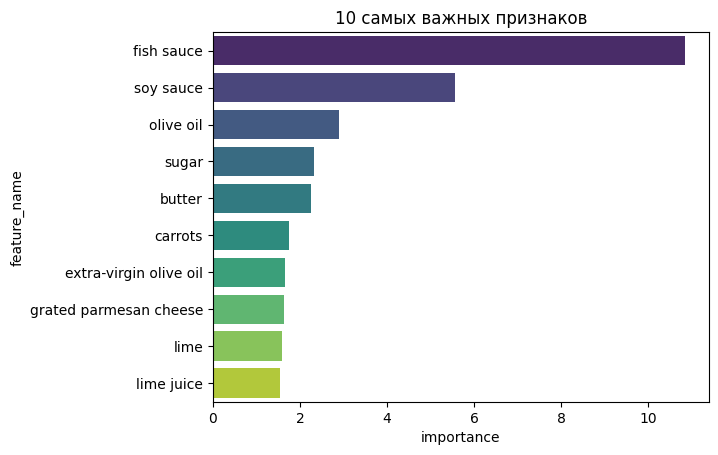

In [ ]:
plt.title('10 самых важных признаков')
sns.barplot(data=feature_importance, x='importance', y='feature_name', palette='viridis');

## Результаты

В данном задании была выполнена предобработка и анализ данных, обучены четыре модели для решения задачи классификации на 20 классов. \
Самый лучший accuracy score дала модель простой логистической регрессии: 0.773.\
Логистическая регрессия с L1 регуляризацией, показала score хуже чем регрессия без регуляризации: 0.768.\
Решающее дерево с глубиной 50 дал accuracy score равный 0.548.\
А метод градиентного бустинга дал accuracy score равный 0.736, но несмотря на результат хуже чем у логистической регрессии он помог осуществить оценку значимости признаков.